In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10dc435c0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10dc43470>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10dc43400>)

In [5]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

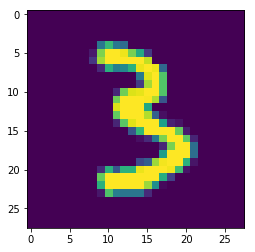

In [10]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[ 0.72903347  1.5485541   0.3437336  ... -0.77426493  1.0619477
   0.0734444 ]
 [-0.36227643 -0.33917832 -0.05959884 ...  1.0687459  -1.08412
  -0.6674941 ]
 [-0.08180004 -1.0630401  -2.631569   ... -1.1938703   0.20091146
   1.3829337 ]
 ...
 [-0.41854867  0.94545203  0.6956705  ...  0.20212825 -0.6492535
  -0.04633959]
 [ 0.32729176 -0.15637864 -1.3281157  ... -0.01489823  0.15293387
   1.7330966 ]
 [ 0.20506379  0.39305472  0.3170255  ...  0.03493625  0.36391762
   0.71110976]]


In [12]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [13]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [14]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [15]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

23278.26731443405
4186.533388569951
2228.980985753238
1357.5218124233647
1070.3217522043258
936.5372076966107
781.7368837741365
703.8129539543107
603.0217791330331
546.7735627468122
399.59345065402533
417.67878972978394
382.4480710962152
331.75977991706804
268.6227656696436
268.5682003221697
239.3170808541268
204.9343615515799
151.1316080916124
107.46822161055752
142.85315616720501
123.41497877864458
96.46300884916127
99.6837627790992
110.71430058410624


In [21]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_preds  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_preds.sum()

9477